In [2]:
#Analysis of Medicare data
#The data can be downloaded from https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/DE_Syn_PUF.html
#The aim is to understand what the distribution of costs and medical conditions across different states and demographical 
#groups. A better understanding could improve allocation of resources and provide better healthcare for beneficiaries of 
#the Medicare program. 

In [3]:
#Import the packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="white", color_codes=True)
%matplotlib inline

In [6]:
df = pd.read_csv("DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116352 entries, 0 to 116351
Data columns (total 32 columns):
DESYNPUF_ID                 116352 non-null object
BENE_BIRTH_DT               116352 non-null int64
BENE_DEATH_DT               1814 non-null float64
BENE_SEX_IDENT_CD           116352 non-null int64
BENE_RACE_CD                116352 non-null int64
BENE_ESRD_IND               116352 non-null object
SP_STATE_CODE               116352 non-null int64
BENE_COUNTY_CD              116352 non-null int64
BENE_HI_CVRAGE_TOT_MONS     116352 non-null int64
BENE_SMI_CVRAGE_TOT_MONS    116352 non-null int64
BENE_HMO_CVRAGE_TOT_MONS    116352 non-null int64
PLAN_CVRG_MOS_NUM           116352 non-null int64
SP_ALZHDMTA                 116352 non-null int64
SP_CHF                      116352 non-null int64
SP_CHRNKIDN                 116352 non-null int64
SP_CNCR                     116352 non-null int64
SP_COPD                     116352 non-null int64
SP_DEPRESSN                 116352 no

In [9]:
df.head(n=4)

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,00013D2EFD8E45D1,19230501,NaN,1,1,0,26,950,12,12,...,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0
1,00016F745862898F,19430101,NaN,1,1,0,39,230,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0
2,0001FDD721E223DC,19360901,NaN,2,1,0,39,280,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00021CA6FF03E670,19410601,NaN,1,5,0,6,290,0,0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.describe()

,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
count,1.163520e+05,1.814000e+03,116352.000000,116352.000000,116352.000000,116352.000000,116352.000000,116352.000000,116352.000000,116352.000000,...,116352.000000,116352.000000,116352.000000,116352.000000,116352.000000,116352.000000,116352.000000,116352.000000,116352.000000,116352.000000
mean,1.936418e+07,2.008065e+07,1.553037,1.284662,25.693740,366.486188,11.143994,10.495514,2.576183,6.826466,...,1.955110,2214.180762,249.053441,99.142258,622.226520,197.502235,25.724182,1162.095881,328.747508,18.355851
std,1.250446e+05,3.493908e+02,0.497181,0.754885,15.582601,266.106008,2.839995,3.758701,4.828831,5.814787,...,0.207063,8473.340573,885.356400,1857.930522,1796.476653,522.437900,370.974324,1587.643182,436.858441,87.356293
min,1.909010e+07,2.008010e+07,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,-3000.000000,0.000000,0.000000,-90.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.928110e+07,2.008030e+07,1.000000,1.000000,10.000000,140.000000,12.000000,12.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.936050e+07,2.008070e+07,2.000000,1.000000,25.000000,330.000000,12.000000,12.000000,0.000000,12.000000,...,2.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,610.000000,170.000000,0.000000
75%,1.942030e+07,2.008100e+07,2.000000,1.000000,39.000000,560.000000,12.000000,12.000000,0.000000,12.000000,...,2.000000,0.000000,0.000000,0.000000,550.000000,180.000000,0.000000,1650.000000,480.000000,0.000000
max,1.983120e+07,2.008120e+07,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,12.000000,12.000000,...,2.000000,164220.000000,53096.000000,68000.000000,50020.000000,12450.000000,14400.000000,21160.000000,5260.000000,2110.000000


In [11]:
rename_dict = {"BENE_BIRTH_DT":"birthday", "BENE_DEATH_DT":"deathday", "BENE_SEX_IDENT_CD":"sex",
               "BENE_RACE_CD":"race", "BENE_ESRD_IND":"renal_disease", "SP_STATE_CODE":"state",
               "BENE_COUNTY_CD":"county", "BENE_HI_CVRAGE_TOT_MONS":"partA", 
               "BENE_SMI_CVRAGE_TOT_MONS":"partB", "BENE_HMO_CVRAGE_TOT_MONS":"hmo",
               "PLAN_CVRG_MOS_NUM":"partD", "SP_ALZHDMTA":"alzheimer", "SP_CHF":"hearth_failure",
               "SP_CHRNKIDN":"kidney_disease", "SP_CNCR":"cancer", "SP_COPD":"pulmanory_disease",
               "SP_DEPRESSN":"depression","SP_DIABETES":"diabetes","SP_ISCHMCHT":"ismechic_hearth",
               "SP_OSTEOPRS":"osteoporosis", "SP_RA_OA":"rheumatoid","SP_STRKETIA":"stroke"}

# List of conditions
diseases = ['renal_disease', 'alzheimer', 'hearth_failure', 'kidney_disease', 'cancer', 'pulmanory_disease',
            'depression', 'diabetes', 'ismechic_hearth', 'osteoporosis', 'rheumatoid','stroke']

df = df.rename(columns=rename_dict)

# One-hot encoding
df['renal_disease'] = df['renal_disease'].map(lambda x: 1 if x=="Y" else 0)

for disease in diseases[1:]:
    df[disease] = df[disease].map(lambda x: 1 if x==1 else 0)

In [12]:
#Convert the dates into date format

In [13]:
df['birthday'] = pd.to_datetime(df['birthday'].astype(str))

# Death dates: first get dead beneficiaries and then set their death time
dead_bene = df[~pd.isnull(df['deathday'])]['deathday'].astype(int).astype(str)
df.loc[dead_bene.index,'deathday'] = pd.to_datetime(dead_bene)


In [14]:
#collect data on three types of payments listed in the data: 1) inpatient, 2) outpatient, 3) carrier

In [15]:
## Payments

# Inpatient
df['tot_inpatient'] = df['MEDREIMB_IP'] + df['BENRES_IP'] + df['PPPYMT_IP']

# Outpatient
df['tot_outpatient'] = df['MEDREIMB_OP'] + df['BENRES_OP'] + df['PPPYMT_OP']

# Carrier
df['tot_carrier'] = df['MEDREIMB_CAR'] + df['BENRES_CAR'] + df['PPPYMT_CAR']

In [16]:
# Demographic features

# Convert to one-hot: M=1/F=0
df['sex'] = df['sex'].map(lambda x: 1 if x==1 else 0)

In [17]:
# Convert race encoding into clear text
def race_code(x):
    if (x == 1):
        return "white"
    elif (x==2):
        return "black"
    elif (x == 5):
        return "hispanic"
    elif (x == 3):
        return "other"

df['race'] = df['race'].map(lambda x: race_code(x))

In [18]:
#Data Visualziation
#Distribution of beneficiaries and cost across states

#Let's look at the top ten states with the largest number of beneficiaries


In [19]:
ser = df.groupby('state').size().sort_values(ascending = False)[:10]
ser

state
5     10224
10     7745
45     6703
33     6510
39     5199
36     4329
14     4277
23     4012
34     3935
31     3176
dtype: int64

In [20]:
#convert the numeric codes into state abbreviations
# Convert into state codes
top_states = ser.index
index_state = np.array(["CA", "FL", "TX", "NY", "PA", "OH", "IL", "MI", "NC", "NJ" ])
state_dictionary = dict(zip(ser.index, index_state))

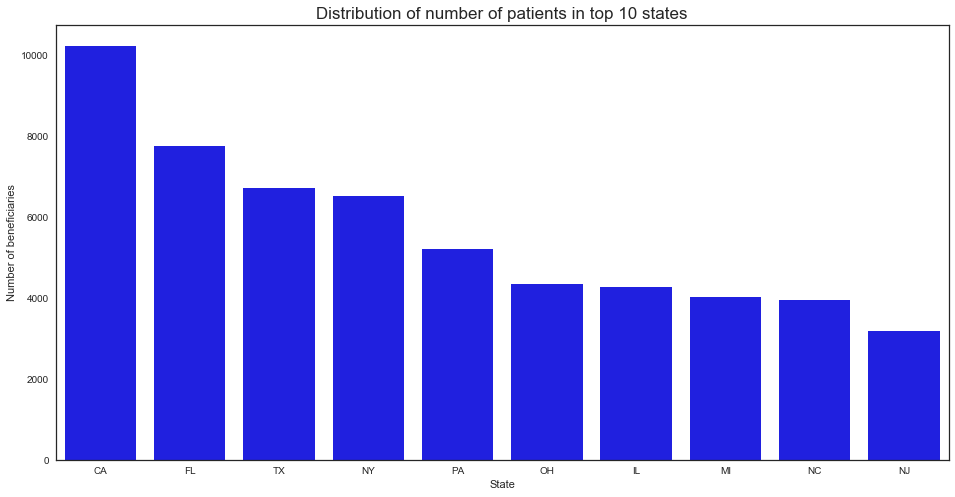

In [27]:
df2 = pd.DataFrame(data = {"state":index_state,"count":ser.values})

fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(x = 'state', y = 'count', data = df2, color = 'blue')
ax.set(xlabel = 'State', ylabel = 'Number of beneficiaries')
plt.title("Distribution of number of patients in top 10 states",fontsize=17)
plt.show()

In [28]:
#California has the largest number of beneficieres followed by Florida. This makes sense since these states have large 
#retiree populations

In [29]:
#Total payment distribution

#Let's look at how Medicare cost is distributed across different forms of payments


In [30]:
payments_df = df[['tot_inpatient','tot_outpatient','tot_carrier']]
payments_df = pd.melt(payments_df)
payments_df = payments_df[payments_df['value'] > 0]

In [31]:
#Let's divide into 5 quantiles of payments

In [32]:
payments_df['quantiles'] = pd.qcut(payments_df['value'], q = np.linspace(0,1,6),
        labels = ["0-20","20-40","40-60","60-80","80-100"])

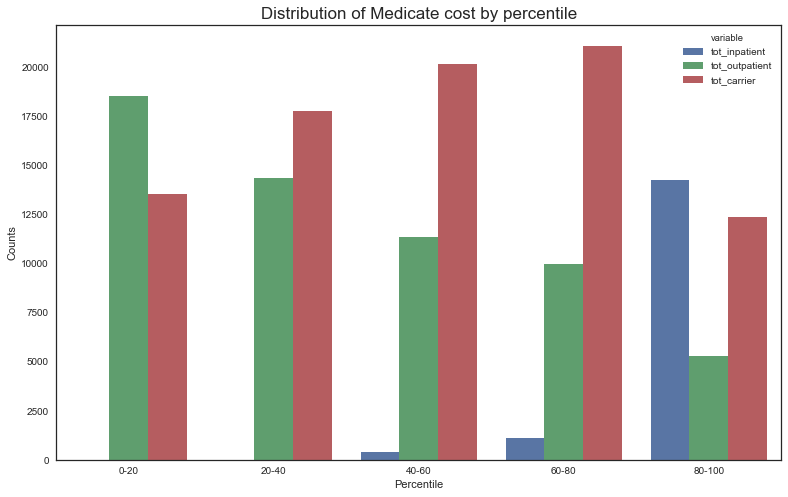

In [35]:
# Plot
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.countplot(x = 'quantiles', data = payments_df, hue = 'variable')
ax.set(xlabel = 'Percentile', ylabel = 'Counts')
plt.title("Distribution of Medicate cost by percentile",fontsize=17)
plt.show()

In [37]:
#As can be seen, inpatient expenses have the largest share in the top percentile, and non-existent in the lowest percentile. 
#Outpatient expenses dominate the lower percentile of payments. 

In [38]:
#Distribution of medical conditions

#Now, let's explore how different medical conditions are distributed


In [39]:
df2 = pd.melt(df[diseases], value_name='has_disease', var_name='disease')
ser = df2.groupby('disease')['has_disease'].sum()
df3 = pd.DataFrame(data = {'disease':ser.index, 'count':ser.values})

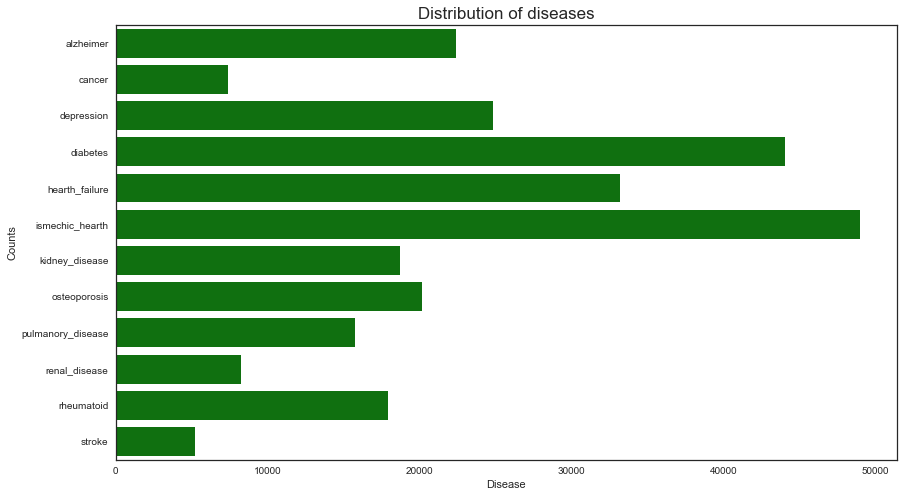

In [40]:
# Plot
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.barplot(y = 'disease', x = 'count', data = df3, color = 'green')
ax.set(xlabel = 'Disease', ylabel = 'Counts')
plt.title("Distribution of diseases",fontsize=17)
plt.show()

In [41]:
#As can be seen, hearth conditions (ismechic hearth disease and hearth failure) and 
#diabetes are the most common conditions, while cancer and stroke are the rarest

In [42]:
#Distribution of medical conditions by state

#Now let's explore how these medical conditions are distributed across the top 10 states


In [43]:
df2 = pd.melt(df[diseases + ['state']], 
             value_vars=diseases, var_name='disease', value_name='has_disease',
             id_vars = 'state')

# Filter by top states
df3 = df2[df2['state'].isin(top_states)]

In [44]:
state_size = df2.groupby('state').size().reset_index()
state_size.columns = ['state','count']

In [46]:
#Compute prevalence of conditions (by taking into account number of beneficiaries by state)

In [51]:
df3 = df2.groupby(['disease','state'])['has_disease'].sum().reset_index()
df3 = pd.merge(df3, state_size, how = 'left', on='state')
df3['prevalence'] = df3['has_disease'] / df3['count']*100

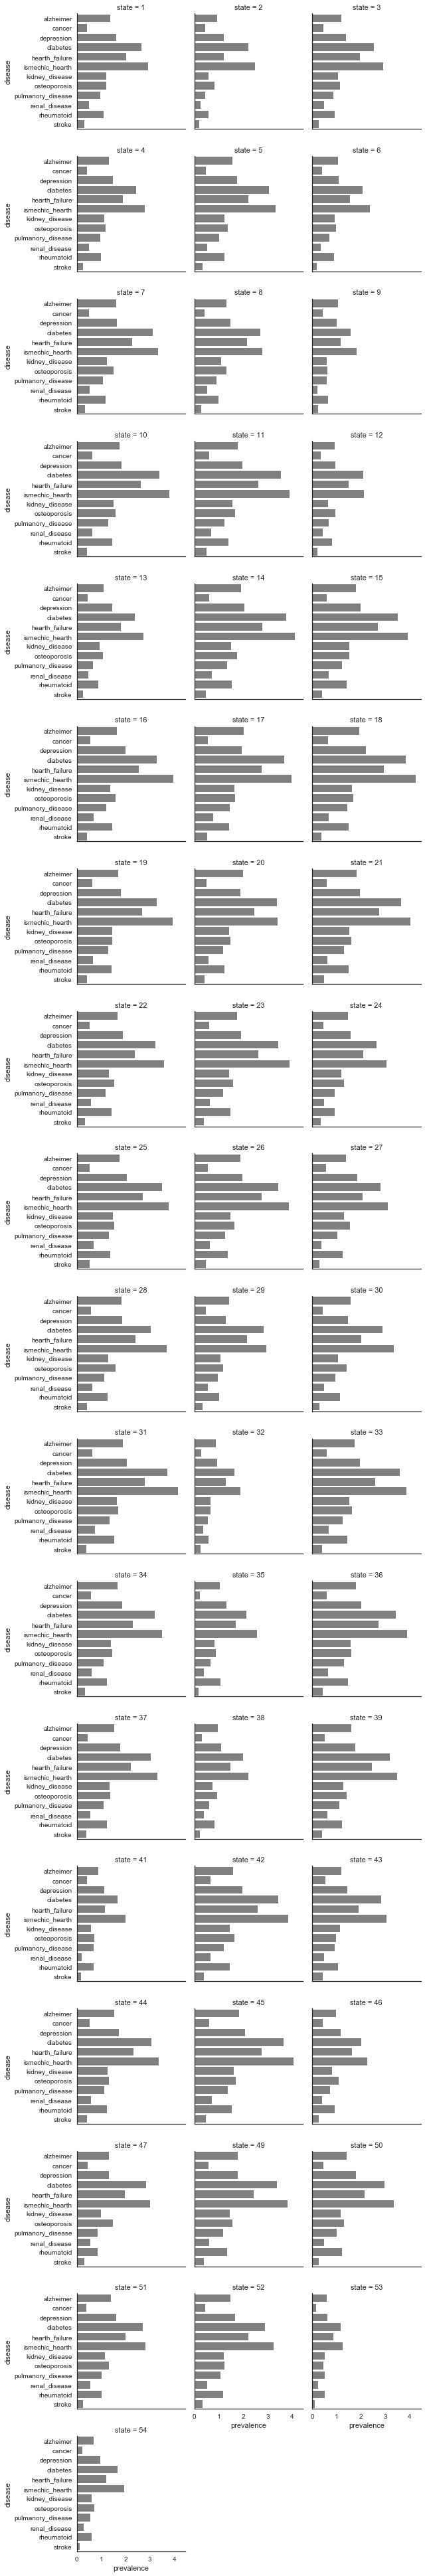

In [54]:
g = sns.FacetGrid(df3, col = 'state', col_wrap=3)
g.map(sns.barplot, "prevalence", "disease", color='grey')


In [55]:
#Overall, the distribution of medical conditions are similar across different states.

In [56]:
#Medical conditions with highest cost

#Now that we have explored distribution of medical conditions, let's explore the costs associated with each condition


In [57]:
df2 = df[diseases + ['tot_inpatient', 'tot_outpatient', 'tot_carrier']]
df3 = pd.melt(df2, value_vars=diseases, var_name = 'disease', value_name='has_disease',
       id_vars = ['tot_inpatient', 'tot_outpatient', 'tot_carrier'])

In [58]:
#Compute total amount of each payment type by disease type

In [59]:
part1 = df3.groupby('disease')['tot_inpatient','has_disease'].apply(lambda x: x['tot_inpatient'].sum() /x['has_disease'].sum())
part2 = df3.groupby('disease')['tot_outpatient','has_disease'].apply(lambda x: x['tot_outpatient'].sum() /x['has_disease'].sum())
part3 = df3.groupby('disease')['tot_carrier','has_disease'].apply(lambda x: x['tot_carrier'].sum() /x['has_disease'].sum())

In [60]:
# Combine
df4 = pd.concat([part1,part2,part3],axis=1, keys=['inpatient','outpatient','carrier']).reset_index()
df5 = pd.melt(df4, id_vars = 'disease', var_name='payment_type', value_name='cost')

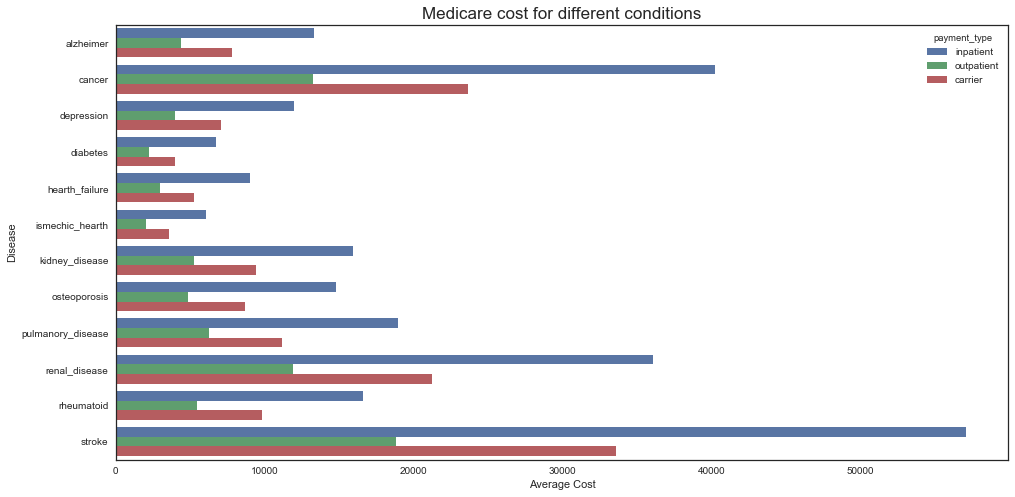

In [62]:
# Plot
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(y = 'disease', x = 'cost', data =df5, hue = 'payment_type')
ax.set(ylabel = 'Disease', xlabel = 'Average Cost')
plt.title("Medicare cost for different conditions",fontsize=17)
plt.show()

In [63]:
#Notice that while stroke is one of the two least common conditions, 
#it is definitely the most expensive (on average) one to treat.

In [65]:
#Distribution of medical conditions between genders
#Now that we have an idea of how different medical conditions and their costs are distributed, 
#let's explore how demographics play a role. We first look at gender:


In [66]:
df2 = df[diseases + ['sex']]
df3 = pd.melt(df2, value_vars=diseases, value_name = 'has_disease', var_name='disease', id_vars = 'sex')
df4 = df3.groupby(['sex','disease'])['has_disease'].sum().reset_index()

sex_counts = df.groupby('sex').size().reset_index()
sex_counts.columns = ['sex','sex_counts']
df4 = pd.merge(df4,sex_counts, how='left', on='sex')
df4['prevalence'] = df4['has_disease'] / df4['sex_counts'] *100

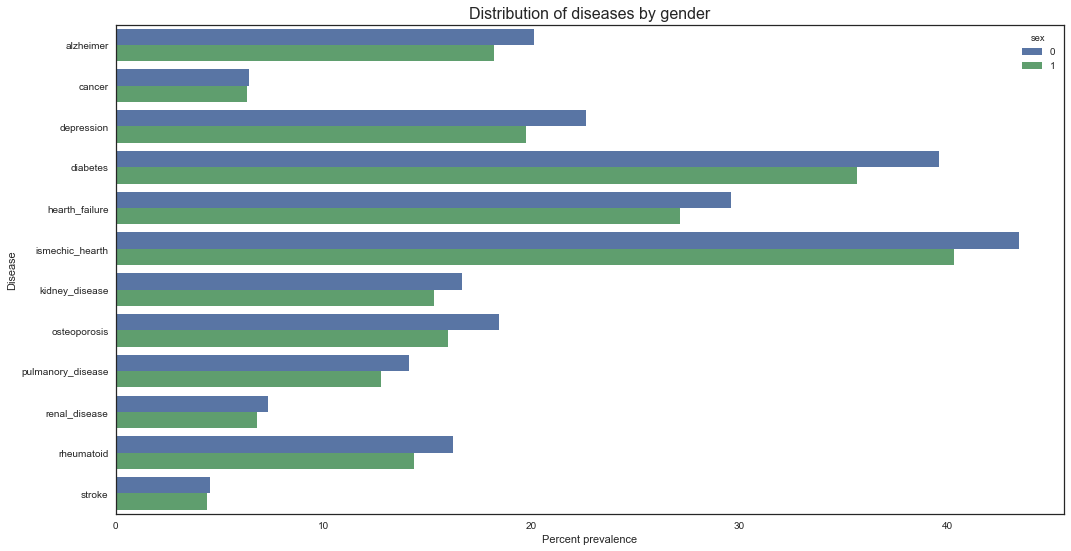

In [67]:
# Plot
fig, ax = plt.subplots(figsize=(17,9))
ax = sns.barplot(y = 'disease', x = 'prevalence', data = df4, hue = 'sex')
ax.set(ylabel = 'Disease', xlabel = 'Percent prevalence')
plt.title("Distribution of diseases by gender",fontsize=16)
plt.show()

In [68]:
#As can be seen, the medical condition prevalences are similar in both men (coded 1) and women (coded 0), 
#women tend to have a higher percentage in all conditions for this sample.

In [69]:
#Distribution of medical conditions among races
#Now, let's look at the distribution of conditions among different racial backgrounds


In [70]:
df2 = df[diseases + ['race']]
df3 = pd.melt(df2, value_vars=diseases, value_name = 'has_disease', var_name='disease', id_vars = 'race')
df4 = df3.groupby(['race','disease'])['has_disease'].sum().reset_index()

race_counts = df2.groupby('race').size().reset_index()
race_counts.columns = ['race','race_counts']
df4 = pd.merge(df4,race_counts, how='left', on='race')
df4['prevalence'] = df4['has_disease'] / df4['race_counts'] *100

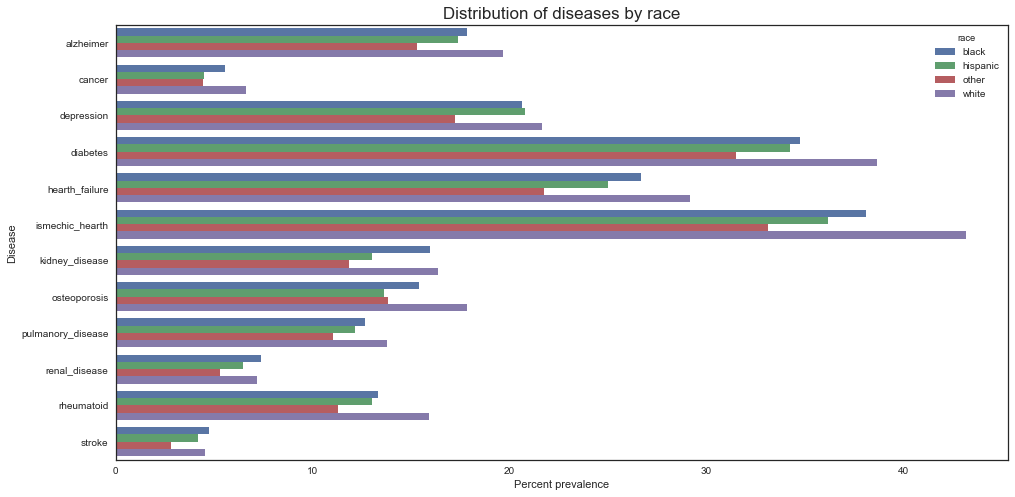

In [71]:
# Plot
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(y = 'disease', x = 'prevalence', data = df4, hue = 'race')
ax.set(ylabel = 'Disease', xlabel = 'Percent prevalence')
plt.title("Distribution of diseases by race",fontsize=17)
plt.show()

In [72]:
#Across all the states, white patients seem to have the highest prevalence of all medical conditions.

In [74]:
#Distribution of medical conditions among races: Comparison of CA and NY

#Let's compare distribution of diseases across racial backgrounds again, but this time focus on CA and NY only.


In [75]:
df2 = df[diseases + ['race', 'state']]
df2 = df2[df2['state'] == 5]
df3 = pd.melt(df2, value_vars=diseases, value_name = 'has_disease', var_name='disease', id_vars = 'race')
df4 = df3.groupby(['race','disease'])['has_disease'].sum().reset_index()

race_counts = df2.groupby('race').size().reset_index()
race_counts.columns = ['race','race_counts']
df4 = pd.merge(df4,race_counts, how='left', on='race')
df4['prevalence'] = df4['has_disease'] / df4['race_counts'] *100

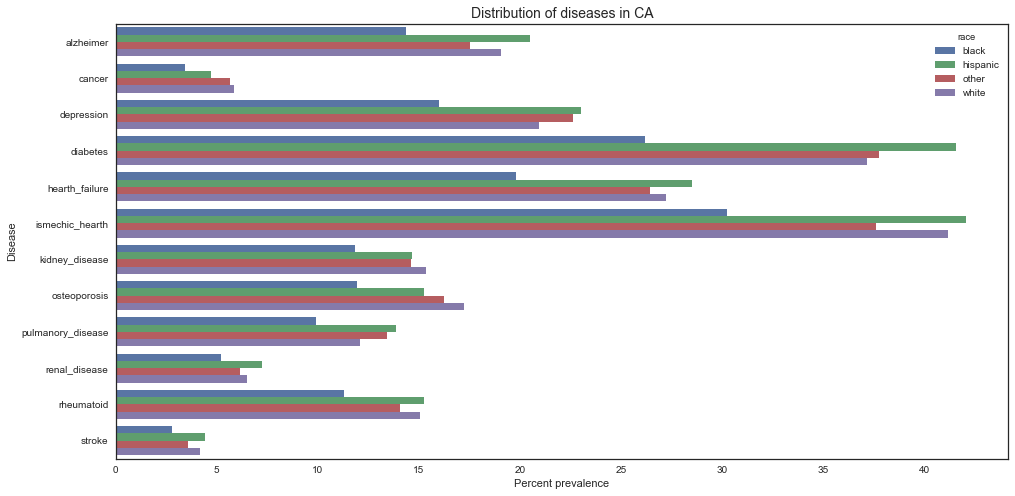

In [76]:
# Plot
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(y = 'disease', x = 'prevalence', data = df4, hue = 'race')
ax.set(ylabel = 'Disease', xlabel = 'Percent prevalence')
plt.title("Distribution of diseases in CA",fontsize=14)
plt.show()

In [77]:
df2 = df[diseases + ['race', 'state']]
df2 = df2[df2['state'] == 33]
df2 = pd.melt(df, value_vars=diseases, value_name = 'has_disease', var_name='disease', id_vars = 'race')
df4 = df3.groupby(['race','disease'])['has_disease'].sum().reset_index()

race_counts = df2.groupby('race').size().reset_index()
race_counts.columns = ['race','race_counts']
df4 = pd.merge(df4,race_counts, how='left', on='race')
df4['prevalence'] = df4['has_disease'] / df4['race_counts'] *100

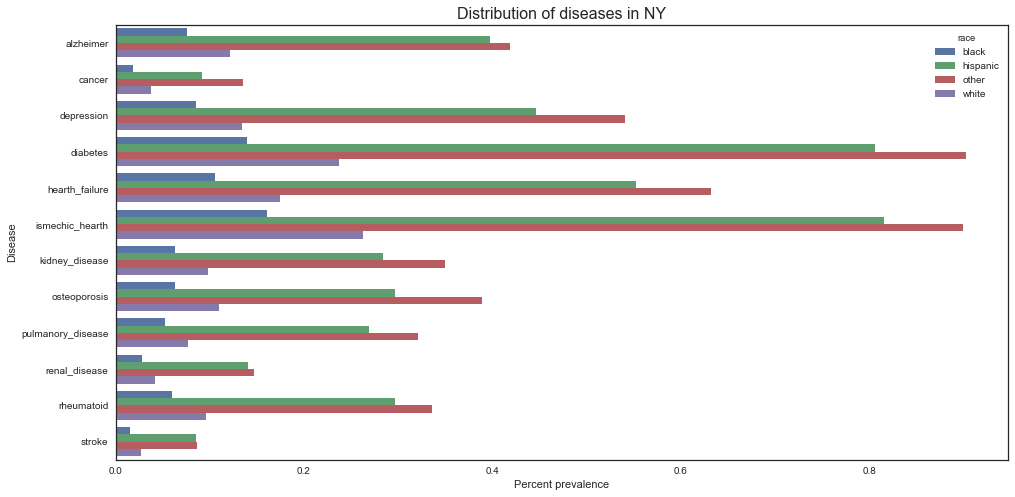

In [78]:
# Plot
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(y = 'disease', x = 'prevalence', data = df4, hue = 'race')
ax.set(ylabel = 'Disease', xlabel = 'Percent prevalence')
plt.title("Distribution of diseases in NY",fontsize=16)
plt.show()

In [84]:
## Conclusions

- From this simple exploratory analysis, we come up with the following conclusions:

1. Hearth related conditions are the most prevalent across all the states, as well as within each state
2. While stroke is one of the least prevalent medical condition, it has the highest cost of treatment
3. inpatient expenses have the largest share in the top percentile, and non-existent in the lowest percentile. Instead outpatient expenses dominate the lower percentile of payments. 
4. Medical condition prevalence is more or less uniform between gender.
5. White patients have the highest prevalence of all medical conditions across the nation, while each states can differ based on its own deomgraphic distribution. 

SyntaxError: invalid syntax (<ipython-input-84-1d7a3ec7bb47>, line 3)